<h1>ACTIVITY 3 -  DENGUE DATA ANALYTICS PROJECT</h1>
<hr>
<h2>Analyst: Raeven Maranan</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [2]:
den=pd.read_csv('datasets\\dengue.csv')

In [3]:
den

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
den.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [5]:
den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
den['Month']=den['Month'].astype('category')
den['Year']=den['Year'].astype('category')
den['Region']=den['Region'].astype('category')
den['Dengue_Cases']=den['Dengue_Cases'].astype('int')
den['Dengue_Deaths']=den['Dengue_Deaths'].astype('int')

In [7]:
den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int32   
 4   Dengue_Deaths  1020 non-null   int32   
dtypes: category(3), int32(2)
memory usage: 12.4 KB


<h1>calculate the mortality rate</h1>

In [8]:
Regional_Death=den.groupby(['Region'])[['Dengue_Deaths','Dengue_Cases']].sum().reset_index()
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [9]:
Regional_Death['Mortality_Rate']=np.round((Regional_Death['Dengue_Deaths']/Regional_Death['Dengue_Cases'])*100,2)

In [10]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


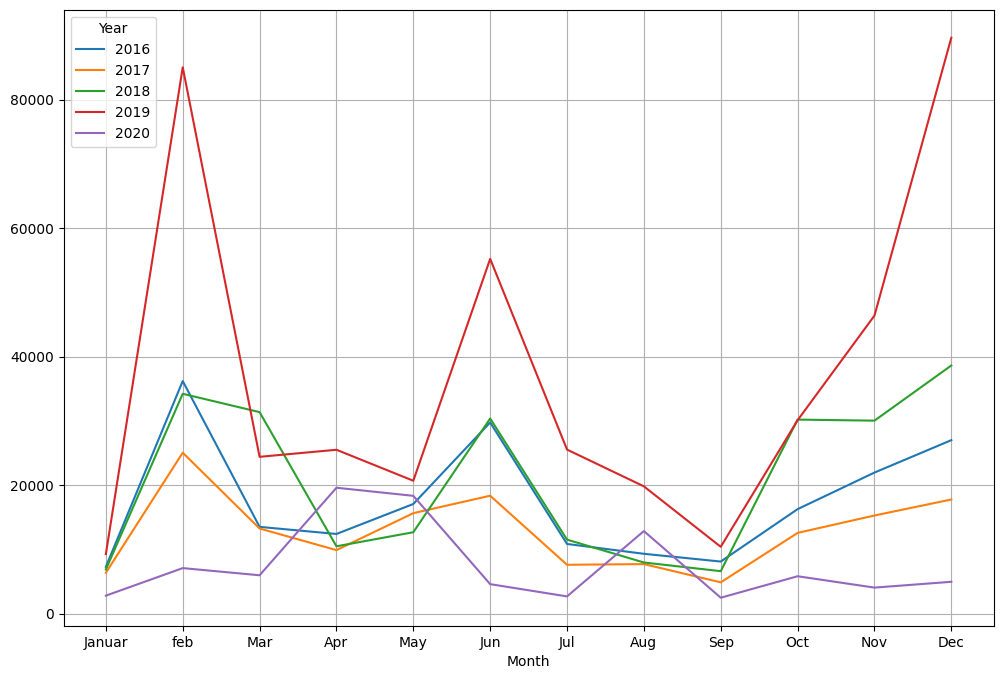

In [11]:
month_order=['Januar','feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

monthly_cases=den.groupby([den.Month,den.Year ])['Dengue_Cases'].sum()

monthly_cases.unstack().plot()
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12),month_order)
plt.show()

<h1>mortality per region thru heat map</h1>

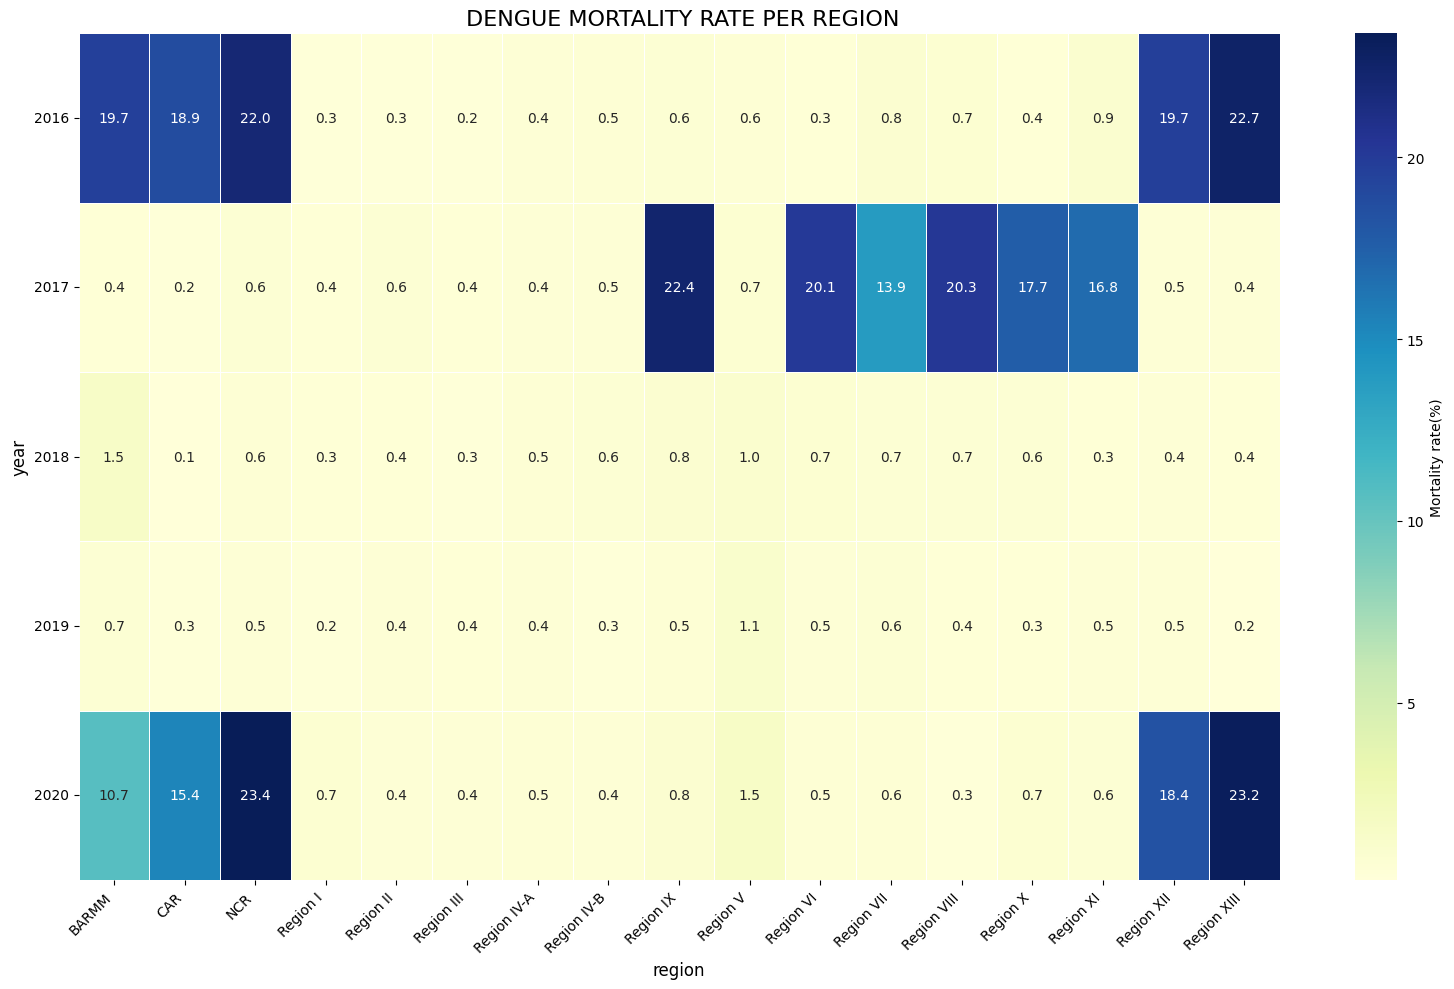

In [12]:
den['Mortality_Rate']=(den['Dengue_Deaths']/den['Dengue_Cases'])*100

heatmap_data=den.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu",linewidths = .5, cbar_kws={'label': 'Mortality rate(%)'})
plt.title(' DENGUE MORTALITY RATE PER REGION', fontsize=16)
plt.xlabel('region',fontsize=12)
plt.ylabel('year',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-learn (from versions: none)
ERROR: No matching distribution found for scikit-learn
